<a href="https://colab.research.google.com/github/AtaruOhto/google-colab-sandbox/blob/master/xgboost_sandbox.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

train_data = pd.read_csv("./train.csv")
y = train_data.y.values
train_data = train_data.drop(["id", "y", "contact"], axis=1)

# contact
# job
# poutcome
# loan


train_data["default"] = train_data["default"].map(dict(no=0, yes=1)).astype('int64')
train_data["housing"] = train_data["housing"].map(dict(no=0, yes=1)).astype('int64')
train_data["loan"] = train_data["loan"].map(dict(no=0, yes=1)).astype('int64')
train_data["month"] = train_data["month"].map(dict(jan=1, feb=2, mar=3, apr=4, may=5, jun=6, jul=7, aug=8, sep=9, oct=10, nov=11, dec=12)).astype('int64')
# X = pd.get_dummies(train_data ,columns=['job', "marital", "education", "contact", "poutcome"])
X = pd.get_dummies(train_data ,columns=["marital", "poutcome", "education","job"])





train_x, test_x, train_y, test_y = train_test_split(X, y, test_size=0.3, shuffle=True) 
train_x

,age,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,education_primary,education_secondary,education_tertiary,education_unknown,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed
8891,58,0,96777,0,0,8,8,158,2,476,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
14203,33,0,80453,1,0,2,6,87,3,383,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
8600,58,0,81702,1,0,2,6,117,1,740,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
11401,37,0,44811,1,0,2,6,87,1,79,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6564,30,0,15961,0,0,28,5,148,1,89,2,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,32,0,25788,1,0,21,11,121,1,574,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0
10462,32,0,62601,1,0,30,5,152,1,12,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4383,34,0,56810,1,0,2,6,87,1,464,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
9341,35,0,35177,1,0,12,5,351,3,831,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
# # グリッドサーチ
# from sklearn.model_selection import StratifiedKFold, GridSearchCV


# params = {
#     "eta": [0.1, 0.2, 0.3],
#     "gamma": [0, 0.1],
#     "n_estimators": [10, 100],
#     "max_depth": [2, 4, 6, 8],
#     "min_child_weigh": [1, 2],
#     "nthread": [2]
# }


# model = xgb.XGBClassifier()  
# skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
# clf = GridSearchCV(estimator=model, param_grid=params,   
#                     cv=skf, scoring="roc_auc", n_jobs=1, verbose=3)  
# clf.fit(train_x, train_y)  

# グリッドサーチ
from sklearn.model_selection import StratifiedKFold, GridSearchCV


params = {
    "eta": [0.1, 0.2, 0.3],
    "gamma": [0, 0.1],
    "n_estimators": [10, 100],
    "max_depth": [2, 4, 6, 8],
    "min_child_weigh": [1, 2],
    "nthread": [2]
}


model = xgb.XGBClassifier()  
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
clf = GridSearchCV(estimator=model, param_grid=params,   
                    cv=skf, scoring="roc_auc", n_jobs=1, verbose=3)  
clf.fit(train_x, train_y)  

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 
[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=0.754, total=   0.1s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=0.750, total=   0.1s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 
[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=0.742, total=   0.1s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=0.769, total=   0.1s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2 
[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=10, nthread=2, score=0.767, total=   0.1s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2 
[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2, score=0.831, total=   0.7s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2 
[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2, score=0.829, total=   0.7s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2 
[CV]  eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2, score=0.826, total=   0.7s
[CV] eta=0.1, gamma=0, max_depth=2, min_child_weigh=1, n_estimators=100, nthread=2 
[CV]  eta=0.1, gamma=0,

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  7.8min finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logi...
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='deprecated', n_jobs=1,
             param_grid={'eta': [0.1, 0.2, 0.3], 'gamma': [0, 0.1],
                         'max_depth': [2, 4, 6

In [ ]:
print("Best score: %.4f" % (clf.best_score_))  
print(clf.best_params_) 
model = clf.best_estimator_ 

Best score: 0.8422
{'eta': 0.1, 'gamma': 0.1, 'max_depth': 4, 'min_child_weigh': 1, 'n_estimators': 100, 'nthread': 2}


In [ ]:

dtrain = xgb.DMatrix(train_x, label=train_y)
dvalid = xgb.DMatrix(test_x, label=test_y)

param = {
    'max_depth': 4, 
    'gamma': 0.1,
    'eta': 0.1, 
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
     'min_child_weigh': 1, 
     'n_estimators': 100, 
     'nthread': 2
}

evallist = [(dvalid, 'eval'), (dtrain, 'train')]  
num_round = 150  
bst = xgb.train(param, dtrain, num_round, evallist, early_stopping_rounds=5) 

[0]	eval-auc:0.765144	train-auc:0.775395
Multiple eval metrics have been passed: 'train-auc' will be used for early stopping.

Will train until train-auc hasn't improved in 5 rounds.
[1]	eval-auc:0.768338	train-auc:0.779016
[2]	eval-auc:0.768928	train-auc:0.779846
[3]	eval-auc:0.769654	train-auc:0.780475
[4]	eval-auc:0.784206	train-auc:0.792973
[5]	eval-auc:0.784398	train-auc:0.793045
[6]	eval-auc:0.783885	train-auc:0.792859
[7]	eval-auc:0.790356	train-auc:0.798944
[8]	eval-auc:0.78987	train-auc:0.798786
[9]	eval-auc:0.790468	train-auc:0.799236
[10]	eval-auc:0.791634	train-auc:0.803994
[11]	eval-auc:0.791766	train-auc:0.804163
[12]	eval-auc:0.793132	train-auc:0.804645
[13]	eval-auc:0.793847	train-auc:0.806439
[14]	eval-auc:0.796273	train-auc:0.809686
[15]	eval-auc:0.797476	train-auc:0.810757
[16]	eval-auc:0.802504	train-auc:0.815935
[17]	eval-auc:0.801874	train-auc:0.816642
[18]	eval-auc:0.804974	train-auc:0.81956
[19]	eval-auc:0.808632	train-auc:0.823595
[20]	eval-auc:0.808749	train-a

In [ ]:
print('Best Score:{0:.4f}, Iteratin:{1:d}, Ntree_Limit:{2:d}'.format(  
     bst.best_score, bst.best_iteration, bst.best_ntree_limit)) 

Best Score:0.9999, Iteratin:475, Ntree_Limit:476


In [ ]:

print(sorted(bst.get_score(), key=bst.get_score().get))
bst.get_score()

# contact
# job
# poutcome
# loan



['poutcome_other', 'poutcome_failure', 'poutcome_unknown', 'marital_divorced', 'loan', 'poutcome_success', 'previous', 'marital_married', 'marital_single', 'housing', 'campaign', 'month', 'duration', 'age', 'day', 'pdays', 'balance']


{'age': 1560,
 'balance': 4461,
 'campaign': 530,
 'day': 1569,
 'duration': 1297,
 'housing': 257,
 'loan': 78,
 'marital_divorced': 65,
 'marital_married': 209,
 'marital_single': 234,
 'month': 903,
 'pdays': 3555,
 'poutcome_failure': 58,
 'poutcome_other': 30,
 'poutcome_success': 106,
 'poutcome_unknown': 65,
 'previous': 191}

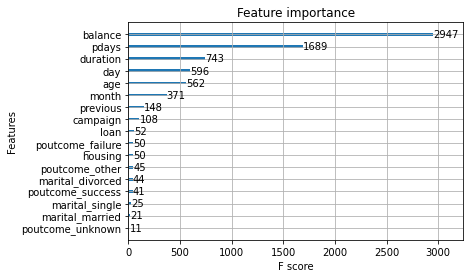

In [ ]:
xgb.plot_importance(bst)  

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_true, y_pred)

NameError: ignored